# Digit Recognizer (MNIST dataset) tutorial
## Using  tf.contrib.learn library

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.learn as skflow
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Let's read the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


## What's MNIST?

+ **"Hello World"** of Machine Learning.
+ Contain images of handwritten digits with integer labels
+ Each image has 28x28 pixels (784 featurs)

Let's explore the data.

In [3]:
#Display 9 random images from data set
def draw_image(x, y, title_str, drawTest = False):
    for c in range(1, 10):
        subplot(3, 3,c)
        i = randint(x.shape[0]) 
        im = x[i].reshape((28,28)) 
        axis("off")
        
        if not drawTest:
            label = np.argmax(y[i]) 
        else:
            label = y[i]
        title("{} = {}".format(title_str, label))
        imshow(im)

## Initialize variables for
- Training set
- Validation set
- Test set

In [4]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_validation = mnist.validation.images
y_validation = mnist.validation.labels
x_test = mnist.test.images
y_test = mnist.test.labels

## Let's see how many data are in each set

In [5]:
print ("Training set: ", x_train.shape)
print ("Validation set: ", x_validation.shape)
print ("Test set: ", x_test.shape)

('Training set: ', (55000, 784))
('Validation set: ', (5000, 784))
('Test set: ', (10000, 784))


## Display 9 random images from training set

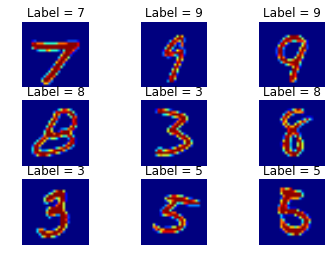

In [6]:
random.seed(42)
# Display 9 number randomly selectly
draw_image(mnist.train.images, mnist.train.labels, "Label")

In [7]:
# Building deep neural network
model = tf.contrib.learn.DNNClassifier(feature_columns=  tf.contrib.learn.infer_real_valued_columns_from_input(x_train),
    hidden_units=[256, 256], 
    n_classes = 10,
    model_dir='model/')


model.fit(x=x_train, y=np.argmax(y_train,1), batch_size= 100, steps = 1000)


DNNClassifier(hidden_units=[256, 256], dropout=None, optimizer=None, feature_columns=[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32)])

In [8]:
pred = model.predict(x_test)

In [9]:
# Calculate accuracy
with tf.Session() as sess:
    correct_prediction = tf.equal(pred, tf.argmax(y_test, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval())
    

('Accuracy:', 0.97649997)


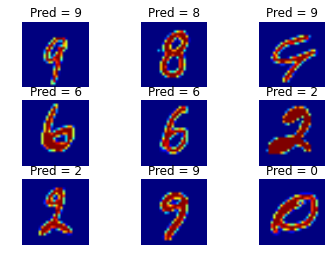

In [10]:
draw_image(mnist.test.images, pred, "Pred",  True)